<a href="https://colab.research.google.com/github/ActiveStacks/DatasetTwo/blob/main/Final1_EXPERIMENT_CODEBERTLLM_2E8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path8)

<ipython-input-4-cef7133f957d>:1: DtypeWarning: Columns (1,2,3,5,6,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path8)


In [5]:

from sklearn.model_selection import train_test_split

In [6]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [7]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [8]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [9]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
12356286,12927643,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN
12356287,12927644,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN
12356288,12927645,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN
12356289,12927646,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN
12356290,12927647,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN


In [10]:
df.shape

(12356291, 18)

In [11]:
df.describe()

,index,CVSS,Vulnerability_status
count,1.235629e+07,75142.000000,1.235629e+07
mean,6.359125e+06,6.990946,1.030779e-02
std,3.745709e+06,1.386911,1.010027e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,3.103984e+06,7.500000,0.000000e+00
50%,6.269958e+06,7.500000,0.000000e+00
75%,9.615736e+06,7.500000,0.000000e+00
max,1.292765e+07,8.800000,1.000000e+00


In [12]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [13]:
df.nunique()

,0
index,12356291
Description,30
Type,4
Pattern,30
Code,12296038
Severity,4
Input Case,2
CVSS,10
CWE_ID,23
CWE_Desc,24


In [14]:
df['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    12228925
1      127366
Name: count, dtype: int64


In [16]:
df_safe = df[df['Vulnerability_status']==0]

In [17]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [18]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [19]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
12356286,12927643,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN
12356287,12927644,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN
12356288,12927645,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN
12356289,12927646,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN
12356290,12927647,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN


In [20]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
28,28,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,changeLog.init();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,changeLog.init();,NaN,NaN,NaN
42,42,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(LOG_TAG, ""Could not get version informat...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(LOG_TAG, ""user_str"", e);",NaN,NaN,NaN
120,120,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(MAIN_ACTIVITY_TAG, ""Settings could not b...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(MAIN_ACTIVITY_TAG, ""user_str"");",NaN,NaN,NaN
177,177,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return getDialog(this.changeLog.isFirstRunEver...,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return getDialog(this.changeLog.isFirstRunEver...,NaN,NaN,NaN
180,180,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return this.changeLog.isFirstRun();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return this.changeLog.isFirstRun();,NaN,NaN,NaN


In [21]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
12356249,12927606,NaN,NaN,NaN,"public native void call(final Pointer p0, @Cas...",NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,"public native void call(final Pointer p0, @Cas...",file,WARNING,Insecure functions found
12356250,12927607,NaN,NaN,NaN,public native void call(freenect.freenect_cont...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native void call(freenect.freenect_cont...,file,WARNING,Insecure functions found
12356251,12927608,NaN,NaN,NaN,public native long call(final AVFormatContext ...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native long call(final AVFormatContext ...,file,WARNING,Insecure functions found
12356252,12927609,NaN,NaN,NaN,public native int call(avcodec.AVCodecContext ...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native int call(avcodec.AVCodecContext ...,file,WARNING,Insecure functions found
12356254,12927611,NaN,NaN,NaN,public native int call(@Const final Pointer p0);,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native int call(@Const final Pointer p0);,file,WARNING,Insecure functions found


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [24]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [25]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    127366
1    127366
Name: count, dtype: int64


In [27]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

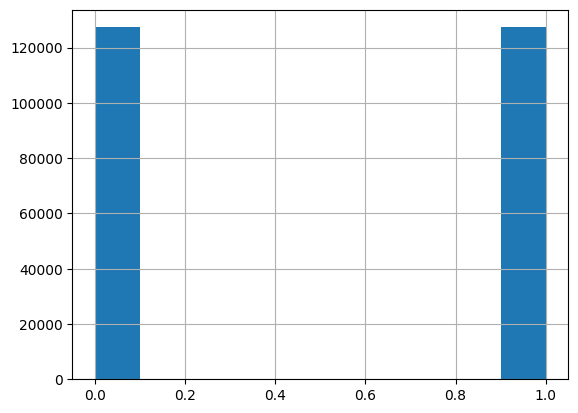

In [28]:
df_balanced['Vulnerability_status'].hist()

In [29]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,11527297,NaN,NaN,NaN,g$b.method_10673(var1);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,g$b.method_10673(var1);,NaN,NaN,NaN
1,3657154,NaN,NaN,NaN,target.localMusicOffset = this.localMusicOffset;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,target.localMusicOffset = this.localMusicOffset;,NaN,NaN,NaN
2,12704926,NaN,NaN,NaN,static int method_1582(int var0) {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,static int method_1582(int var0) {,NaN,NaN,NaN
3,1239880,NaN,NaN,NaN,MainActivity.this.scan();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,MainActivity.this.scan();,NaN,NaN,NaN
4,6714827,NaN,NaN,NaN,return this.n() && !this.h();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return this.n() && !this.h();,NaN,NaN,NaN


In [30]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,11527297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,g$b.method_10673(var1);,NaN,NaN,NaN
1,3657154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,target.localMusicOffset = this.localMusicOffset;,NaN,NaN,NaN
2,12704926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,static int method_1582(int var0) {,NaN,NaN,NaN
3,1239880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,MainActivity.this.scan();,NaN,NaN,NaN
4,6714827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return this.n() && !this.h();,NaN,NaN,NaN
5,11104263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,* This class is used to parse vcard3.0. <br>,file,INFO,Hardcoded HTTP url found
6,8375727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public boolean method_1781(int var1) {,NaN,NaN,NaN
7,526625,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", ""user_str"" + b10);",NaN,NaN,NaN
8,4644448,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", String.format(""user_str"", st...",NaN,NaN,NaN
9,2099841,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", Float.toString(f2));",NaN,NaN,NaN


In [32]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
254722,1194238,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + this + ""user_st...",NaN,NaN,NaN
254723,2714850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,p2.setAdapter(x2.e);,NaN,NaN,NaN
254724,9130049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public interface class_1089 {,NaN,NaN,NaN
254725,7605665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var8.setDescription(var9.getTextContent().trim...,NaN,NaN,NaN
254726,7739575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.dismissMenus();,NaN,NaN,NaN
254727,8191539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"throw new r0(b.a.a.a.a.a(""user_str"", c4, ""user...",NaN,NaN,NaN
254728,5415247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"registerReceiver(this.mWifiStateReceiver, this...",NaN,NaN,NaN
254729,4251200,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", ""user_str"" + i + ""user_str"" ...",NaN,NaN,NaN
254730,5458871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class NotificationChannelUtils {,NaN,NaN,NaN
254731,2977209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public void autoSaveState(final boolean z) {,NaN,NaN,NaN


In [33]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [34]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df_balanced.head()

,processed_code,Vulnerability_status
0,g$b.method_10673(var1);,0
1,target.localMusicOffset = this.localMusicOffset;,0
2,static int method_1582(int var0) {,0
3,MainActivity.this.scan();,0
4,return this.n() && !this.h();,0


In [36]:
df_balanced.columns = ['text', 'labels']

In [37]:
df_balanced.head(5)

,text,labels
0,g$b.method_10673(var1);,0
1,target.localMusicOffset = this.localMusicOffset;,0
2,static int method_1582(int var0) {,0
3,MainActivity.this.scan();,0
4,return this.n() && !this.h();,0


In [38]:
df_balanced.head(5)

,text,labels
0,g$b.method_10673(var1);,0
1,target.localMusicOffset = this.localMusicOffset;,0
2,static int method_1582(int var0) {,0
3,MainActivity.this.scan();,0
4,return this.n() && !this.h();,0


In [39]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset, DatasetDict

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 254732
    })
})

In [44]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [45]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [46]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 152839
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 50947
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 50946
    })
})

In [47]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [48]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [49]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [50]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/152839 [00:00<?, ? examples/s]

Map:   0%|          | 0/50947 [00:00<?, ? examples/s]

Map:   0%|          | 0/50946 [00:00<?, ? examples/s]

In [51]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
!pip install torchinfo

In [53]:
from torchinfo import summary

In [54]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [55]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [57]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 49.9 kB/s eta 0:00:00


In [58]:
import evaluate

In [59]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [60]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-60-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [61]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.139200,0.135684,{'accuracy': 0.9658854473363954},{'recall': 0.9629395745352647},{'precision': 0.9682898757788626},{'f1': 0.9656073138876796}
2,0.123300,0.135549,{'accuracy': 0.9693989714599772},{'recall': 0.9631369143939693},{'precision': 0.9750279686750839},{'f1': 0.969045964459446}
3,0.093600,0.110720,{'accuracy': 0.9737565265182743},{'recall': 0.9716619962900107},{'precision': 0.9754734923528013},{'f1': 0.9735640138408305}
4,0.066700,0.104311,{'accuracy': 0.9747379578377106},{'recall': 0.9744247543118759},{'precision': 0.9747710044219836},{'f1': 0.9745978486134412}


Trainer is attempting to log a value of "{'accuracy': 0.9658854473363954}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9629395745352647}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9682898757788626}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9656073138876796}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9693989714599772}" of type <class 

TrainOutput(global_step=38212, training_loss=0.1137559001363161, metrics={'train_runtime': 13561.5544, 'train_samples_per_second': 45.08, 'train_steps_per_second': 2.818, 'total_flos': 1.6085452236066816e+17, 'train_loss': 0.1137559001363161, 'epoch': 4.0})

In [62]:
outcome= trainer.predict(tokenized_datasets['test'])

In [63]:
print(outcome.metrics)

{'test_loss': 0.10306917130947113, 'test_accuracy': {'accuracy': 0.975170274991658}, 'test_recall': {'recall': 0.9747674920535259}, 'test_precision': {'precision': 0.9755714397926322}, 'test_f1': {'f1': 0.9751693002257337}, 'test_runtime': 316.9257, 'test_samples_per_second': 160.754, 'test_steps_per_second': 2.515}
